In [15]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9):
    '''
    Parameters
    ----------
    im_name : Str
        The image file name.
    pat1 : Str
        A string pattern in the filename for 1st class, e.g "C1_"
    pat2 : Str
        A string pattern in the filename 2nd class, e.g, "C2_"
    Returns
    -------
    Label : Numpy array        
        Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    elif pat3 in im_name:
        label = np.array([2])
    elif pat4 in im_name:
        label = np.array([3])
    elif pat5 in im_name:
        label = np.array([4])
    elif pat6 in im_name:
        label = np.array([5])
    elif pat7 in im_name:
        label = np.array([6])
    elif pat8 in im_name:
        label = np.array([7])
    elif pat9 in im_name:
        label = np.array([8])
        
    return label


def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
        Path to the data directory
    train_list : List
        A list containing the name of the images.
    img_h : Int
        image height to be resized to.
    img_w : Int
        image width to be resized to.    
    Returns
    -------
    img_labels : Nested List
        A nested list containing the loaded images along with their
        correcponding labels.
    """
    img_labels = []      
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'C1_', 'C2_','C3_', 'C4_','C5_', 'C6_','C7_', 'C8_', 'C9_')])
       
        if item[0] % 100 == 0:
             print('Reading: {0}/{1}  of train images'.format(item[0], len(data_list)))
             
    shuffle(img_labels)
    return img_labels


def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
        nested list of image arrays with corresponding class labels.
    img_h : Int
        Image height.
    img_w : Int
        Image width.
    Returns
    -------
    img_arrays : Numpy array
        4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
        1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays


def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
   
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
   
    train_img, train_label =  get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)      
    return train_img, test_img, train_label, test_label

In [16]:
data_path = '/DL_course_data/Lab1/X_ray'

test_idx = 20 # Change this value to try different test cases

train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

test_list = os.listdir(test_data_path)
filename = os.path.join(test_data_path,test_list[test_idx])

In [17]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/X_ray/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
     train_data_path, test_data_path,
     train_list, test_list, img_h, img_w)

Reading: 0/5780  of train images
Reading: 100/5780  of train images
Reading: 200/5780  of train images
Reading: 300/5780  of train images
Reading: 400/5780  of train images
Reading: 500/5780  of train images
Reading: 600/5780  of train images
Reading: 700/5780  of train images
Reading: 800/5780  of train images
Reading: 900/5780  of train images
Reading: 1000/5780  of train images
Reading: 1100/5780  of train images
Reading: 1200/5780  of train images
Reading: 1300/5780  of train images
Reading: 1400/5780  of train images
Reading: 1500/5780  of train images
Reading: 1600/5780  of train images
Reading: 1700/5780  of train images
Reading: 1800/5780  of train images
Reading: 1900/5780  of train images
Reading: 2000/5780  of train images
Reading: 2100/5780  of train images
Reading: 2200/5780  of train images
Reading: 2300/5780  of train images
Reading: 2400/5780  of train images
Reading: 2500/5780  of train images
Reading: 2600/5780  of train images
Reading: 2700/5780  of train images
Read

In [18]:
print(y_train.shape,x_train.shape,x_test.shape,y_test.shape)


(5780,) (5780, 128, 128, 1) (450, 128, 128, 1) (450,)


In [19]:
print(y_test)

[4 3 6 4 1 2 3 7 3 0 2 6 6 4 2 7 5 5 5 3 0 2 8 5 4 8 1 5 4 1 3 0 7 1 0 7 8
 6 1 8 2 0 5 5 3 8 0 0 5 7 4 0 8 0 6 2 4 0 1 4 3 8 7 8 0 0 0 3 5 3 7 8 2 7
 4 7 7 8 6 8 4 4 7 6 1 0 5 4 8 7 3 0 8 2 6 0 5 5 0 6 0 5 8 6 1 0 7 2 8 5 7
 2 1 0 5 0 1 8 4 3 3 5 4 5 6 4 4 1 5 7 5 5 6 6 3 1 8 2 6 4 5 2 6 1 1 8 5 4
 6 1 7 4 3 1 7 1 7 1 7 6 8 0 3 6 4 4 4 2 6 8 2 4 2 6 2 2 1 4 1 7 8 8 5 7 2
 7 7 5 7 2 3 8 8 2 7 6 8 6 8 5 6 2 3 0 4 2 6 3 8 4 3 1 3 0 6 3 4 8 8 1 0 4
 4 1 3 3 3 8 2 3 0 1 0 0 2 8 4 7 4 2 6 7 2 6 7 6 4 7 0 4 7 2 4 7 1 1 3 8 0
 5 4 8 3 5 2 4 1 3 5 2 0 5 2 6 6 5 7 2 4 0 3 8 7 5 2 1 6 3 8 8 1 7 2 8 4 0
 6 1 5 2 3 3 2 7 3 1 3 0 0 4 7 0 0 2 4 7 7 7 6 3 2 3 2 0 1 4 1 0 1 6 0 1 0
 7 0 2 2 2 5 5 6 8 2 2 3 4 1 7 3 2 5 1 6 7 3 3 8 1 2 5 2 7 4 6 6 2 0 5 7 3
 1 3 2 7 0 6 5 3 0 3 2 6 2 5 6 5 6 5 1 1 6 1 4 5 1 1 3 1 0 1 4 8 0 1 0 8 6
 6 6 0 8 3 6 4 8 5 6 1 6 7 8 8 5 5 5 1 6 4 5 5 3 0 8 3 4 3 5 1 8 5 8 8 7 4
 8 7 7 3 7 4]


In [20]:
import tensorflow as tf

One-hot

In [21]:
y_test = np.eye(9)[y_test]
y_train = np.eye(9)[y_train]

In [22]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [52]:
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

LeNet

In [53]:
def model(img_width, img_height, img_ch, base):
        """
        Functional API model.
        name the last layer as "out"; e.g., out = ....
        """        
        input_size = (img_width, img_height, img_ch)
        inputs_layer = Input(shape=input_size, name='input_layer')
        inputs_layer1 = inputs_layer

        conv1 = Conv2D(base, kernel_size = (3, 3), activation='relu',
                      strides=1, padding='same',
                      input_shape = (img_width, img_height, img_ch))(inputs_layer1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        conv2 = Conv2D(base*2, kernel_size = (3, 3), activation='relu',
               strides=1, padding='same')(pool1)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

        inputs_dense = Flatten()(pool2)
        hidden4 = Dense(base*2, activation='relu')(inputs_dense)
        out = Dense(9,activation='softmax')(hidden4)
        model = Model(inputs=inputs_layer, outputs=out)
        model.summary()
        return model

In [54]:
firstlayer =8
batchsize = 4
n_epochs = 20  # 20
learningrate = 0.0001   #0.00001

clf =  model(img_w, img_h,1,firstlayer)

clf.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = Adam(lr = learningrate),
               metrics=['acc'])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                2621

In [55]:
train_count = len(train_list)
test_count = len(test_list)
print(train_count,test_count)

5780 450


In [56]:
steps_per_epoch = train_count//batchsize
validation_steps = test_count//batchsize

In [57]:
# clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, 
#                    steps_per_epoch = steps_per_epoch,
#                    batch_size = batchsize, validation_data = (x_test,y_test),
#                    validation_steps = validation_steps)
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, 
                   batch_size = batchsize, validation_data = (x_test,y_test))

Train on 5780 samples, validate on 450 samples
Epoch 1/20
5780/5780 [==============================] - 11s 2ms/sample - loss: 0.8688 - acc: 0.7133 - val_loss: 0.9054 - val_acc: 0.7111
Epoch 2/20
5780/5780 [==============================] - 10s 2ms/sample - loss: 0.3213 - acc: 0.8926 - val_loss: 0.5853 - val_acc: 0.8311
Epoch 3/20
5780/5780 [==============================] - 10s 2ms/sample - loss: 0.2446 - acc: 0.9147 - val_loss: 0.5123 - val_acc: 0.8444
Epoch 4/20
5780/5780 [==============================] - 10s 2ms/sample - loss: 0.2198 - acc: 0.9240 - val_loss: 0.4181 - val_acc: 0.8822
Epoch 5/20
5780/5780 [==============================] - 10s 2ms/sample - loss: 0.1988 - acc: 0.9292 - val_loss: 0.4684 - val_acc: 0.8578
Epoch 6/20
5780/5780 [==============================] - 10s 2ms/sample - loss: 0.1862 - acc: 0.9343 - val_loss: 0.3848 - val_acc: 0.8756
Epoch 7/20
5780/5780 [==============================] - 10s 2ms/sample - loss: 0.1731 - acc: 0.9386 - val_loss: 0.3503 - val_acc: 0

In [58]:
clf_hist.history.keys()

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

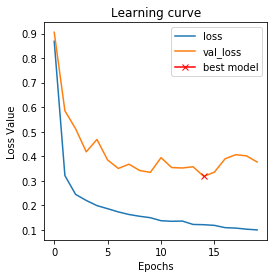

the minimum var_loss is 0.31785493069781096
the Best epoch nr is 14
the maximum var_accuracy is 0.91333336
the maximum train_accuracy is 0.9631488
the Best epoch nr is 14


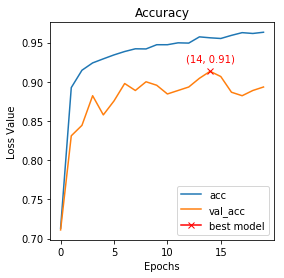

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["acc"], label="acc")
plt.plot(clf_hist.history["val_acc"], label="val_acc")
xmax = np.argmax(clf_hist.history["val_acc"])
ymax = np.max(clf_hist.history["val_acc"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
print('the maximum var_accuracy is', np.max(clf_hist.history["val_acc"]))
print('the maximum train_accuracy is', np.max(clf_hist.history["acc"]))
print('the Best epoch nr is', xmax)

AlexNet

In [65]:
def model(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dense(64))
     model.add(Activation('relu'))
        
     model.add(Dense(9))
     model.add(Activation('softmax'))
     model.summary() 
     return model

In [66]:
firstlayer =8
batchsize = 4
n_epochs = 20  # 20
learningrate = 0.0001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = Adam(lr = learningrate),
               metrics=['acc'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, 
                   batch_size = batchsize, validation_data = (x_test,y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)       

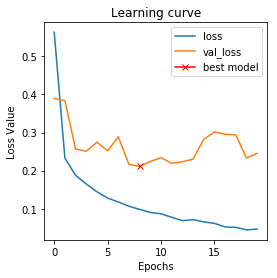

the minimum var_loss is 0.2111638435584286
the Best epoch nr is 8
the maximum var_accuracy is 0.95111114
the maximum train_accuracy is 0.98391
the Best epoch nr is 18


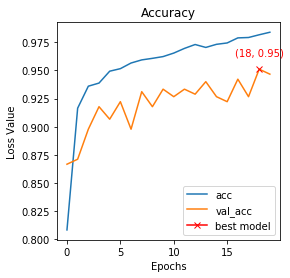

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["acc"], label="acc")
plt.plot(clf_hist.history["val_acc"], label="val_acc")
xmax = np.argmax(clf_hist.history["val_acc"])
ymax = np.max(clf_hist.history["val_acc"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
print('the maximum var_accuracy is', np.max(clf_hist.history["val_acc"]))
print('the maximum train_accuracy is', np.max(clf_hist.history["acc"]))
print('the Best epoch nr is', xmax)